In [32]:
# import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
import warnings 
warnings.filterwarnings(action= 'ignore')

In [56]:
# get data 
glass = pd.read_csv('glass.csv')

<AxesSubplot:>

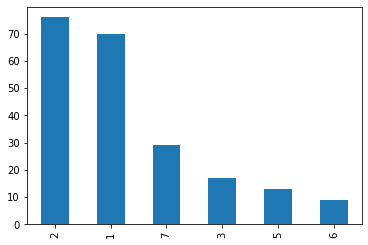

In [35]:
# barplotting
glass['Type'].value_counts().plot(kind = 'bar')
# most of the glass here is of type 2 i.e.,building_windows_non_float_processed

In [36]:
# given Type
#1 -- building_windows_float_processed
#2 --building_windows_non_float_processed
#3 --vehicle_windows_float_processed
#4 --vehicle_windows_non_float_processed (none in this database)
#5 --containers
#6 --tableware
#7 --headlamps

In [57]:
norm_glass = pd.DataFrame(MinMaxScaler().fit_transform(glass.iloc[:,:9]))

In [38]:
# splitting the data into x and y 
x= norm_glass
y = glass.iloc[:,9]

In [39]:
model = KNeighborsClassifier()
k = np.array(range(0,40)) 
param_grid = dict(n_neighbors = k)

In [40]:
# Grid search for tuning the hyper parameter k
grid = GridSearchCV(model,param_grid=param_grid,cv=10).fit(x,y)
best_k_value = grid.best_params_
best_k_value

{'n_neighbors': 4}

In [41]:
kfold = KFold(n_splits=10)

In [42]:
model_knn = KNeighborsClassifier(n_neighbors=4)
result = cross_val_score(model_knn,x,y,cv=kfold)
result = np.mean(result)
result

0.5086580086580087

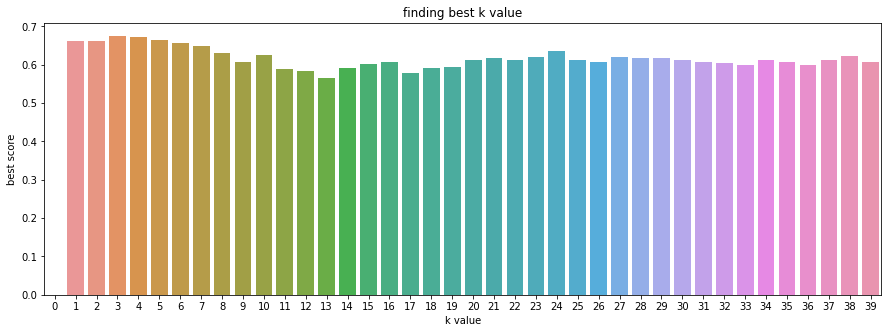

In [43]:
plt.figure(figsize=(15,5))
k_range = k
k_score = []
for m in k_range:
    knn= KNeighborsClassifier(n_neighbors=m)
    scores = cross_val_score(knn ,x,y,cv = 20)
    k_score.append(scores.mean())
sns.barplot(k_range,k_score)
plt.xlabel('k value')
plt.ylabel('best score')
plt.title('finding best k value')
plt.show()

<AxesSubplot:>

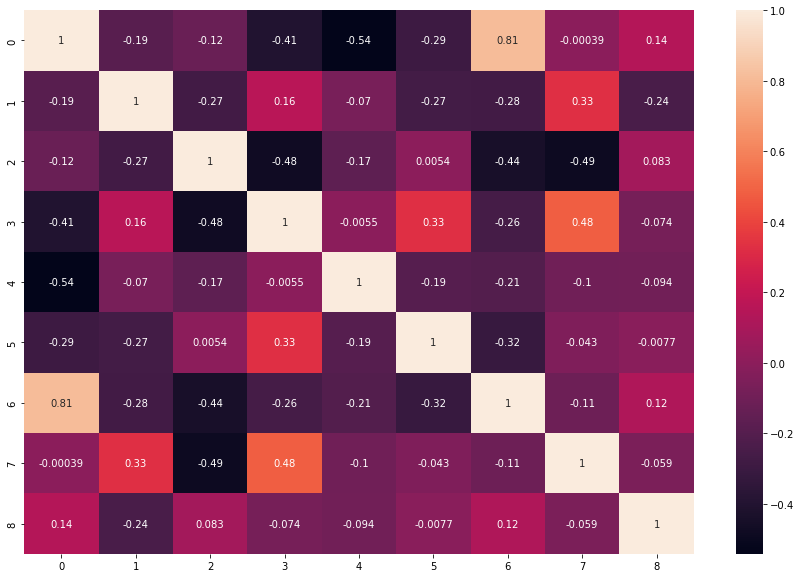

In [58]:
# plotting confusion_matrix using heatmap
confusion_matrix = norm_glass.corr()
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix,annot=True)